In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8807, 12)

In [8]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['country'] = df['country'].str.strip().str.lower()
df['listed_in'] = df['listed_in'].str.strip().str.lower()
df['rating'] = df['rating'].str.strip().str.upper()

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [14]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [15]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [16]:
df['duration_type'] = df['duration'].str.extract(r'(min|Season)')

In [17]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         98
release_year        0
rating              4
duration            3
listed_in           0
description         0
year_added         98
month_added        98
duration_num        3
duration_type       3
dtype: int64

In [18]:
df['duration_num'] = df['duration_num'].fillna(0)
df['duration_type'] = df['duration_type'].fillna('Unknown')

In [19]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         98
release_year        0
rating              4
duration            3
listed_in           0
description         0
year_added         98
month_added        98
duration_num        0
duration_type       0
dtype: int64

In [20]:
df['year_added'] = df['year_added'].fillna(0)
df['month_added'] = df['month_added'].fillna(0)

In [21]:
df = df.dropna(subset=['date_added'])

In [22]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2541
cast              817
country           827
date_added          0
release_year        0
rating              4
duration            3
listed_in           0
description         0
year_added          0
month_added         0
duration_num        0
duration_type       0
dtype: int64

In [23]:
df.to_csv("../data/netflix_cleaned_final.csv", index=False)

In [24]:
df.shape

(8709, 16)

# Milestone 2 - EDA & Feature Engineering

In [25]:
df['year_added'].value_counts().sort_index()

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

content growth was slow before 2015
rapid increse observed frm 2016 
peak addtion occured in 2019
slight decline seen after 2019

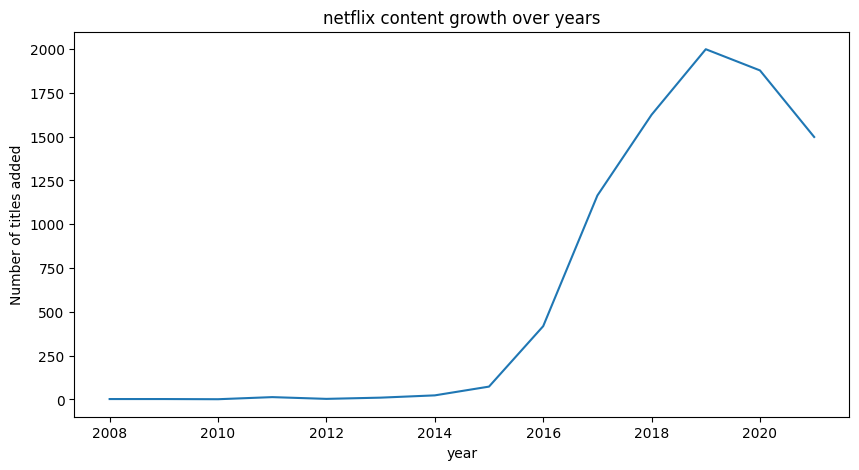

In [27]:
import matplotlib.pyplot as plt

yearly = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(yearly.index,yearly.values)
plt.title("netflix content growth over years")
plt.xlabel("year")
plt.ylabel("Number of titles added")
plt.show()

In [28]:
df['type'].value_counts()

type
Movie      6131
TV Show    2578
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

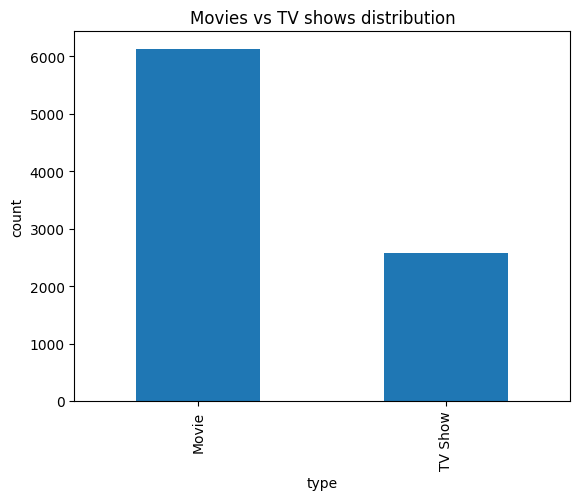

In [30]:
df['type'].value_counts().plot(kind = 'bar')
plt.title("Movies vs TV shows distribution")
plt.xlabel("type")
plt.ylabel("count")
plt.show

In [31]:
df['listed_in'] = df['listed_in'].str.split(', ')
genre_df = df.explode('listed_in')

genre_df['listed_in'].value_counts().head(10)

listed_in
international movies        2752
dramas                      2427
comedies                    1674
international tv shows      1328
documentaries                869
action & adventure           859
independent movies           756
tv dramas                    739
children & family movies     641
romantic movies              616
Name: count, dtype: int64

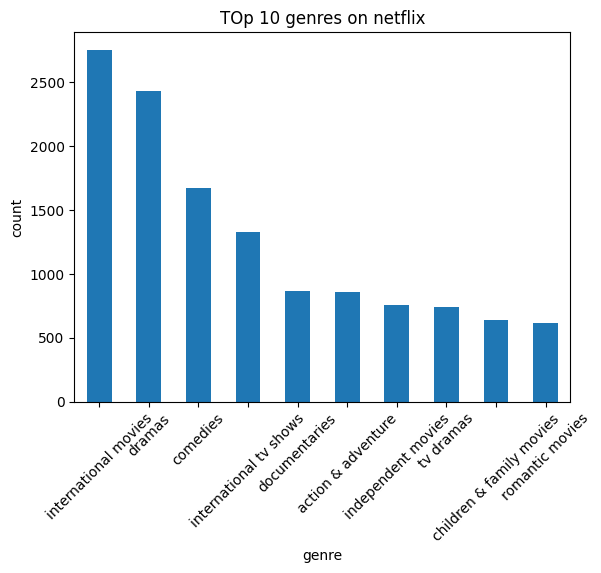

In [33]:
genre_df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("TOp 10 genres on netflix")
plt.xlabel("genre")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [34]:
df['country'] = df['country'].str.split(', ')
country_df = df.explode('country')

country_df['country'].value_counts().head(10)

country
united states     3642
india             1045
united kingdom     785
canada             432
france             389
japan              314
spain              228
south korea        226
germany            225
mexico             169
Name: count, dtype: int64

In [35]:
df[['duration_num','duration_type']].head()

,duration_num,duration_type
0,90.0,min
1,2.0,Season
2,1.0,Season
3,1.0,Season
4,2.0,Season


In [38]:
def categorize_length(row):
    if row['type'] == 'Movie':
        if row['duration_num'] < 60:
            return 'Short'
        elif row['duration_num'] <= 120:
            return 'Medium'
        else:
            return 'Long'
    else:
        return 'TV Show'
df['content_length_category'] = df.apply(categorize_length, axis=1)

In [39]:
df['content_length_category'].value_counts()

content_length_category
Medium     4528
TV Show    2578
Long       1142
Short       461
Name: count, dtype: int64

- Majority of movies fall under the 'Medium' category (60–120 mins).
- TV Shows form a significant portion of the platform.
- Long-duration movies are fewer compared to medium-length films.
- Short movies represent a small portion of the catalog.

In [40]:
df['is_original'] = df['description'].str.contains("Netflix", case=False, na=False)
df['is_original'].value_counts()

is_original
False    8700
True        9
Name: count, dtype: int64

# Original vs Licensed Feature (Heuristic Based)

- The feature was derived by checking the presence of the keyword "Netflix" in the description.
- Only 9 titles were identified as Netflix Originals.
- This method is not fully reliable, as many Originals may not explicitly mention "Netflix" in the description.
- Therefore, this feature should be treated as an approximate indicator.